## Mini Project III

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import geopandas as gpd
import sqlite3


### connect to database

In [2]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [3]:
connection = create_connection("data/twm.db")

Connection to SQLite DB successful


### Read from database

In [4]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [5]:
customers_df = pd.read_sql('SELECT * FROM twm_customer', con = connection)
customers_df.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362480,50890,33,3,2,M,2,Mr.,Hans,Beed,6498,H,10209,NewYorkCity,NY
1,1362481,20855,36,6,2,F,2,None,Darby,Beed,6498,H,10209,NewYorkCity,NY
2,1362484,10053,42,2,0,F,1,None,Lana,Gilmore,13393,Rose,80275,Denver,CO
3,1362485,22690,25,4,0,F,1,Dr.,Elvira,Linderman,4581,Daffodil,10140,NewYorkCity,NY
4,1362486,10701,76,6,0,F,3,Ms.,Kyle,McVicker,9813,SamHouston,75230,Dallas,TX


### Get Customer data into dataframe

In [6]:
customers_df = pd.read_csv('data/twm_customer.csv', sep=";")
customers_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [7]:
customers_df.isnull().any()

cust_id            False
income             False
age                False
years_with_bank    False
nbr_children       False
gender             False
marital_status     False
name_prefix        False
first_name         False
last_name          False
street_nbr         False
street_name        False
postal_code        False
city_name          False
state_code         False
dtype: bool

In [8]:
customers_df.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

#### Encode city name

#### Drop columns that are not being considered

In [9]:
columns_to_drop = ['cust_id','gender','name_prefix','first_name','last_name','street_nbr', 'street_name','postal_code','city_name','state_code','marital_status']
customers_df_dropped = customers_df.drop(columns_to_drop, axis=1)
customers_df_dropped

,income,age,years_with_bank,nbr_children
0,26150,46,5,1
1,6605,71,1,0
2,18548,38,8,0
3,47668,54,3,0
4,44554,59,9,2
...,...,...,...,...
742,14795,36,6,1
743,26387,56,6,1
744,61300,50,0,2
745,15100,37,7,0


#### Normalize columns

In [10]:
normalized_df=(customers_df_dropped-customers_df_dropped.mean())/customers_df_dropped.std()
normalized_df

,income,age,years_with_bank,nbr_children
0,0.154081,0.184189,0.408266,0.258418
1,-0.726038,1.492071,-1.086707,-0.647864
2,-0.188240,-0.234333,1.529495,-0.647864
3,1.123045,0.602711,-0.339221,-0.647864
4,0.982821,0.864287,1.903239,1.164699
...,...,...,...,...
742,-0.357239,-0.338964,0.782009,0.258418
743,0.164754,0.707342,0.782009,0.258418
744,1.736900,0.393450,-1.460450,1.164699
745,-0.343505,-0.286648,1.155752,-0.647864


Distortion plot

In [11]:
def plot_distortion(X,max_clusters = 5):
    distortions= []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters + 1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    


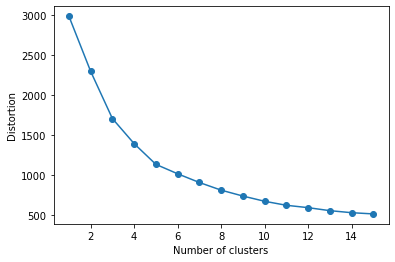

In [12]:
plot_distortion(normalized_df, max_clusters = 15)

### kmeans clustering

In [13]:
def fit_kmeans(X, n_clusters = 3):    
    km = KMeans(n_clusters=n_clusters,
                n_init=10, 
                random_state=0)

    y_km = km.fit_predict(X)
    return y_km

In [16]:
y_km = fit_kmeans(normalized_df, 5)

### Radar plots

In [19]:
def plot_clusters_radar(X, y):    
    fig = go.Figure()

    for cluster in set(y):    
        r = [X[y == cluster][i].mean() for i in X.columns]
        categories =  list(X.columns)
        
        # append first element so radar plot line is closed
        r.append(r[0])
        categories.append([categories[0]])

        fig.add_trace(go.Scatterpolar(
              r=r,
              theta=categories,
              name=f'cluster {cluster}',

        ))

    fig.update_layout(width = 800, height =800)

    fig.show()

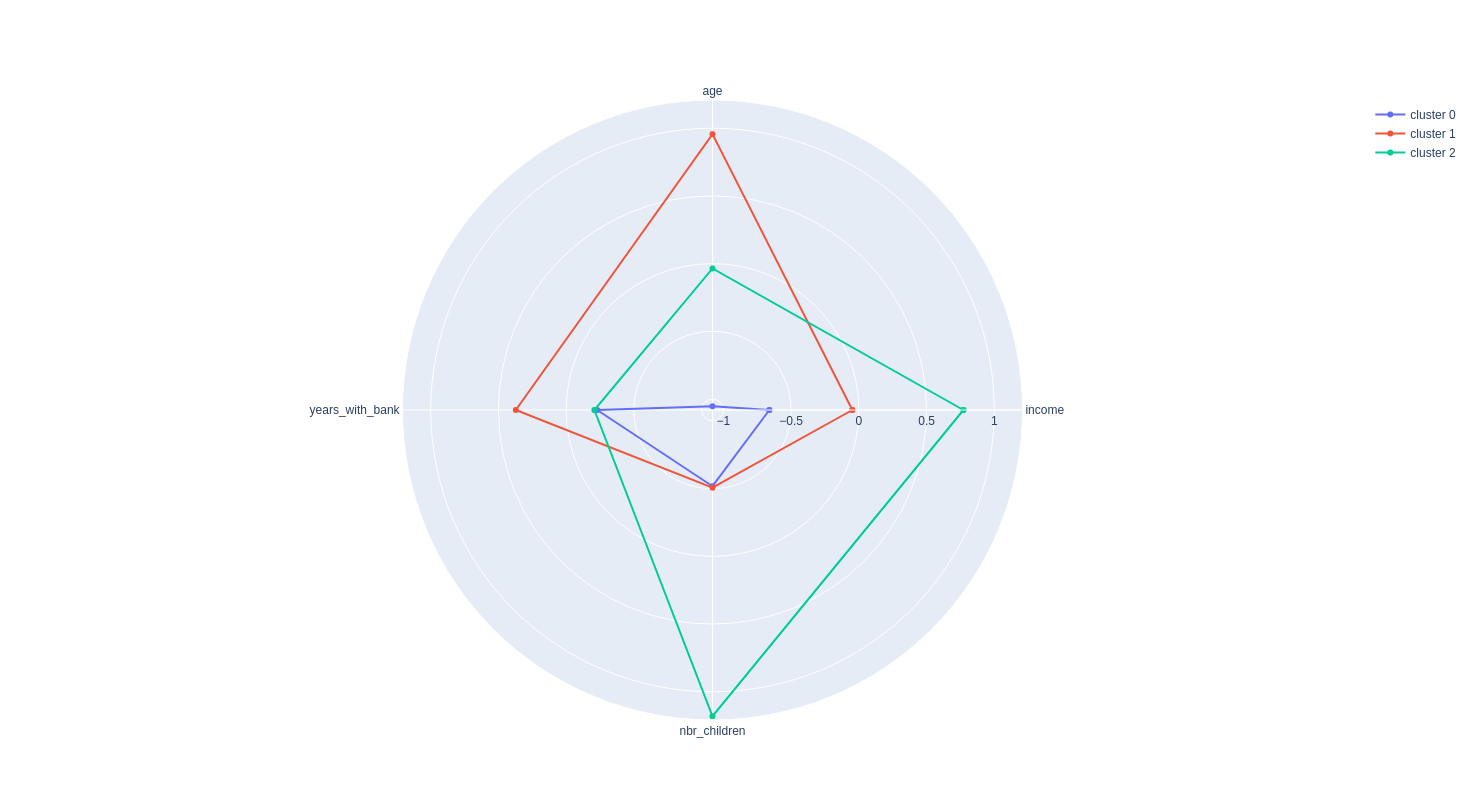

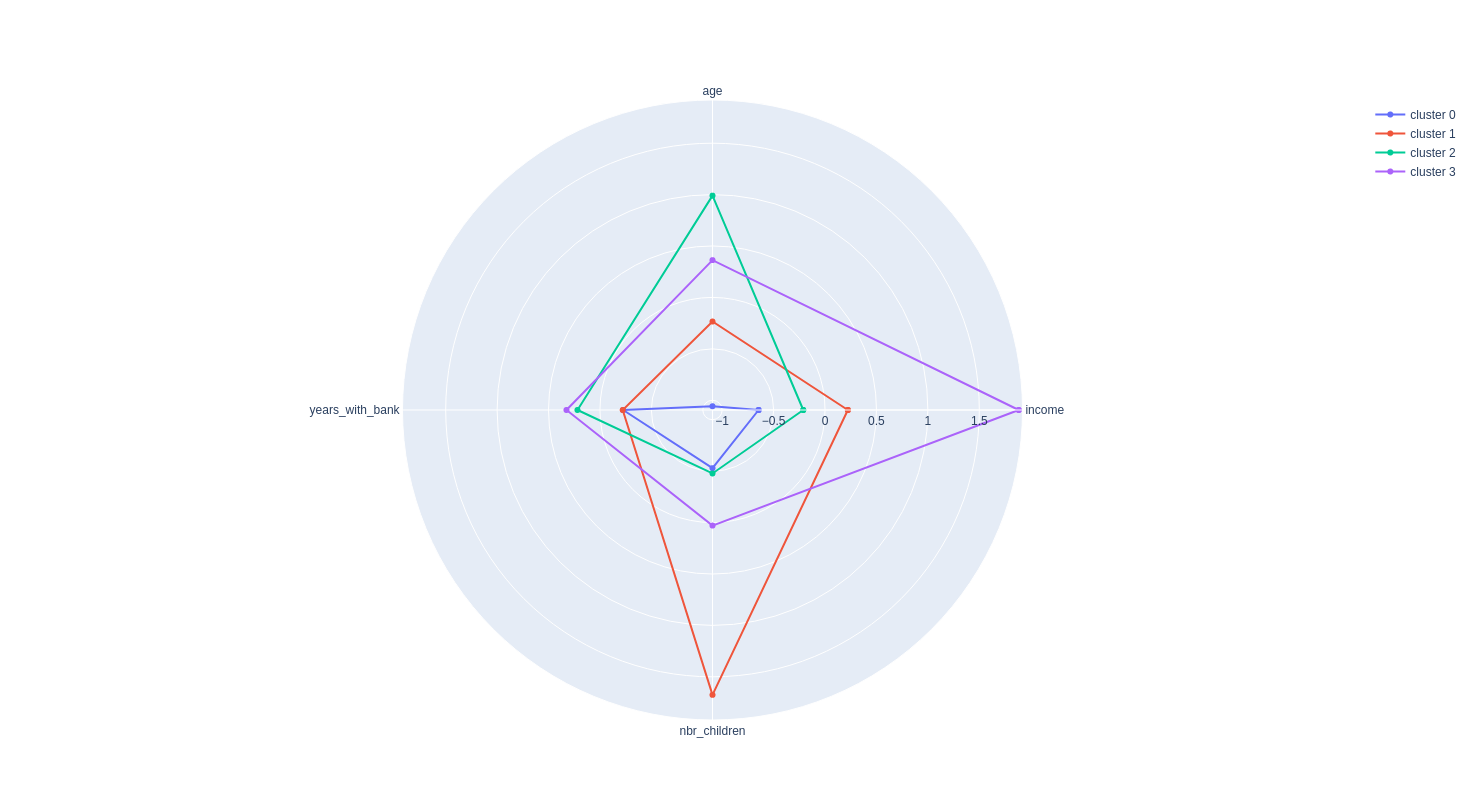

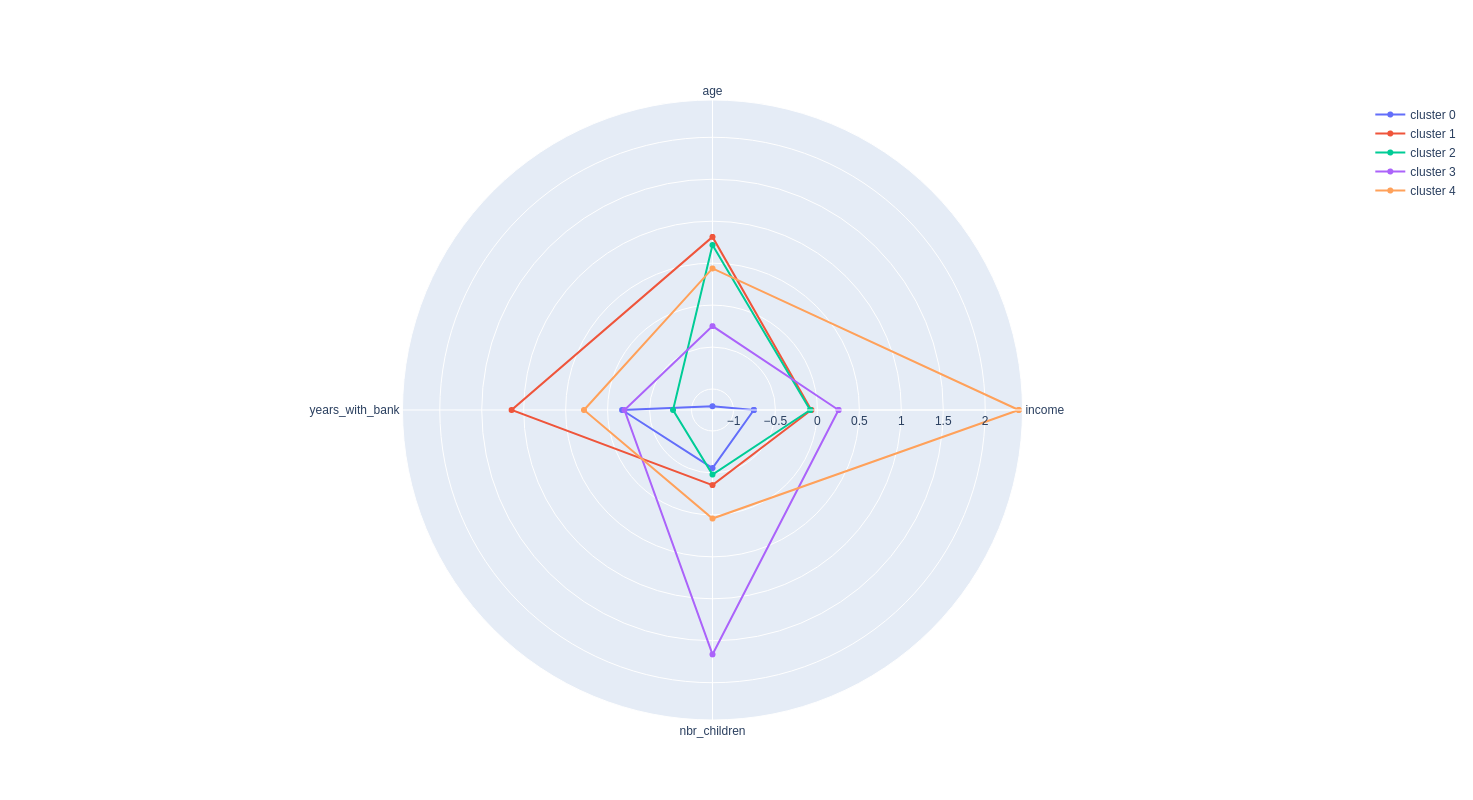

In [20]:
# create radar plots for i number of clusters
for i in range(3,6):
    plot_clusters_radar(normalized_df, fit_kmeans(normalized_df, i))

### PCA

In [24]:
#plotly version
def plot_pca_biplot(X,targets,loadings_visible=False):    
    pca = PCA()
    components = pca.fit_transform(X)
    
    fig = px.scatter(components, x=0, y=1, color=targets, color_continuous_scale=px.colors.sequential.Viridis, width=800, height=800, title="PCA Biplot")
    
    if loadings_visible:
        loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
        for i, feature in enumerate(X.columns):
            fig.add_shape(
                type='line',
                x0=0, y0=0,
                x1=loadings[i, 0],
                y1=loadings[i, 1]
            )
            fig.add_annotation(
                x=loadings[i, 0],
                y=loadings[i, 1],
                ax=0, ay=0,
                xanchor="center",
                yanchor="bottom",
                text=feature,
            )
    fig.show()

In [26]:
# matplotlib version. colors match radar plot colors
def plot_pca_biplot(X,targets,loadings_visible=False):    
    pca = PCA()
    components = pca.fit_transform(X)
    print(components[:,1].shape)
    fig, ax = plt.subplots(figsize=(10,8))
    color_dict = {0: 'b',
                  1: 'r',
                  2: 'g',
                  3: 'purple',
                  4: 'orange'}
    for cluster in set(targets):
        ax.scatter(components[targets == cluster][:,0], components[targets== cluster][:,1], c=color_dict[cluster], label=f'cluster {cluster}')
        ax.legend()

    plt.show()

(747,)


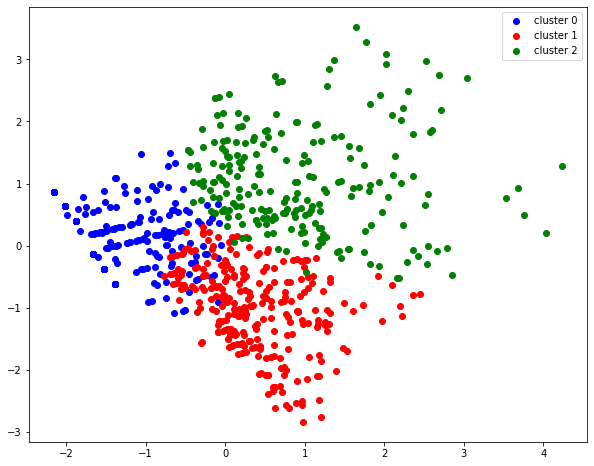

(747,)


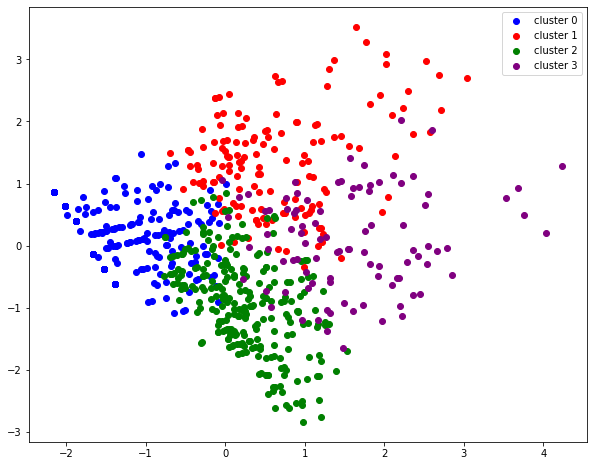

(747,)


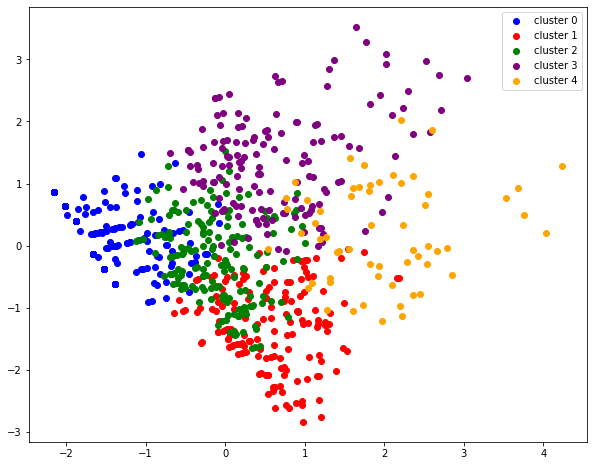

In [27]:
# plot pca biplots for i number of clusters. kmeans clusters as targets
for i in range(3,6):
    plot_pca_biplot(normalized_df,fit_kmeans(normalized_df,i),loadings_visible=True) 

## Get account data
merge with customer data


In [28]:
accounts_df = pd.read_csv('data/twm_accounts.csv')

In [29]:
accounts_df

,acct_nbr;cust_id;acct_type;account_active;acct_start_date;acct_end_date;starting_balance;ending_balance
0,13628063;1362806;SV ;Y ;10.12.1995;NULL;1430....
1,4561143213627090;1362709;CC ;Y ;15.3.1993;NUL...
2,4561143213628360;1362836;CC ;Y ;18.3.1992;NUL...
3,13633112;1363311;CK ;Y ;6.7.1995;NULL;11017.1...
4,4561143213633610;1363361;CC ;Y ;17.6.1994;NUL...
...,...
1404,4561143213625560;1362556;CC ;N ;20.1.1992;19....
1405,4561143213626240;1362624;CC ;Y ;29.11.1990;NU...
1406,4561143213628750;1362875;CC ;Y ;24.2.1989;NUL...
1407,13626543;1362654;SV ;Y ;17.10.1992;NULL;784.5...


# Map

In [30]:
# code for state outlines data
file_path = 'data/states/cb_2018_us_state_5m.shx'
map_us = gpd.read_file(file_path)
map_us['GEOID'] = map_us['GEOID'].map(int)
#filter for only lower 48 states
filtered_map_us = map_us[(map_us['GEOID']<57) & (-map_us['GEOID'].isin((2,15)))]
map_us.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


## create plot

In [31]:
#filter customers_df for mean income, age, and years_with_bank per state
customers_filtered = customers_df[['age', 'income', 'years_with_bank', 'state_code']]
grouped_state = customers_filtered.groupby('state_code').mean().reset_index()
grouped_state

,state_code,age,income,years_with_bank
0,AL,49.000000,12004.750000,6.250000
1,AZ,47.875000,23217.000000,3.291667
2,CA,38.898305,22741.237288,4.079096
3,CO,47.818182,23686.272727,4.545455
4,DC,42.666667,17073.833333,5.500000
5,FL,43.500000,29311.062500,3.937500
6,GA,30.000000,21161.500000,4.500000
7,HI,39.307692,11851.230769,4.846154
8,IL,39.839286,27899.803571,3.553571
9,IN,55.125000,20576.312500,4.312500


In [32]:
def plot_column_on_map(X,column_to_plot):    
    # Creating a subplot, with 'fig' and 'ax'
    fig, ax = plt.subplots(1, figsize=(15, 8))
    # Sending the filtered dat to plot
    plt.title(f'Customer mean {column_to_plot} by state', size=16)
    column_color = {'age': 'YlOrRd',
                    'income': 'Greens',
                    'years_with_bank': 'BuPu',
                    'Expendable_income': 'gist_rainbow',
                    'Number of Credit Transactions': 'Blues',
                    'Average Credit Transaction Amount': 'Oranges'
                   }
    
    #strip whitspace from state_code column of customers groups by state
    X['state_code'] = X['state_code'].str.strip()

    merged_df = pd.merge(filtered_map_us, X, how='left', left_on='STUSPS', right_on='state_code')

    # fill in 0 for states that don't have customer data
    merged_df = merged_df.fillna(0)


    merged_df.plot(column=column_to_plot,
                cmap= column_color[column_to_plot],      # Colormap for the states                     
                 linewidth=0.4,      # line width for state borders
                 ax=ax,              # plotting the map on 'ax'
                 edgecolor='black',    # State border colors
                  legend=True); 

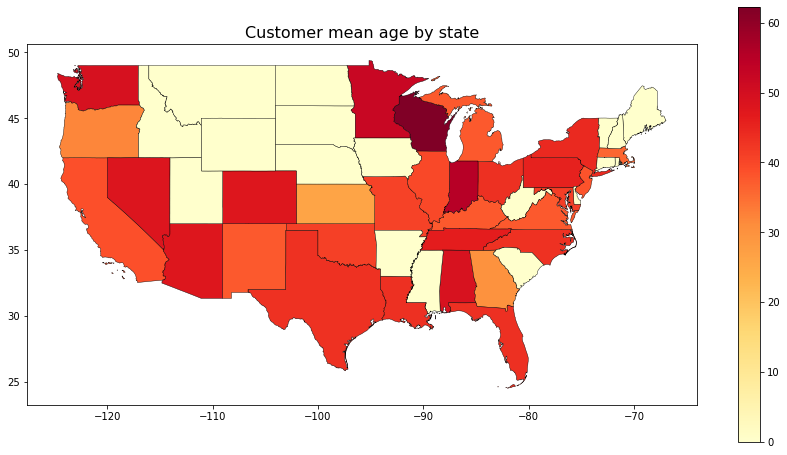

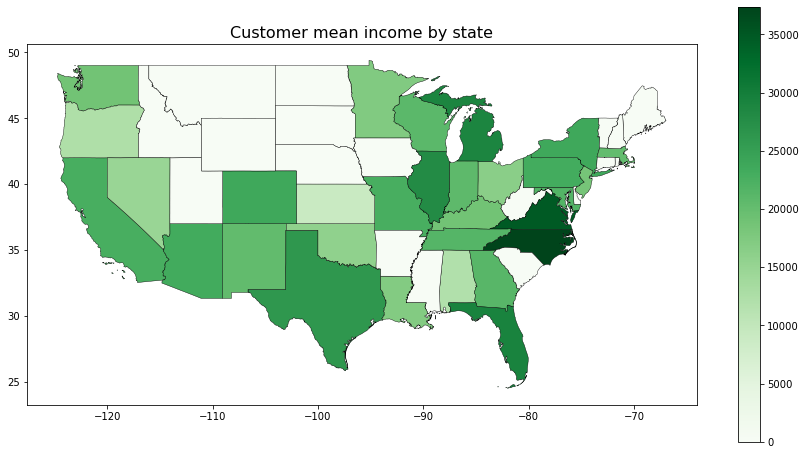

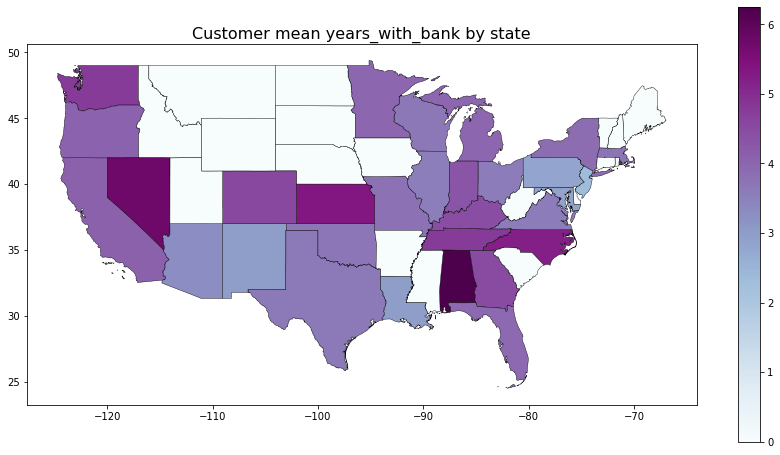

In [33]:
for i in range(len(grouped_state.columns)-1):
    plot_column_on_map(grouped_state, grouped_state.columns[i + 1])

# Using spending behavior to cluster

In [34]:
customer_profile  = pd.read_csv('data/customer_profile.csv')
customer_profile

,cust_id,Credit Account,Checking Account,Savings Account,Expendable_income,Number of Credit Transactions,Average Credit Transaction Amount,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,1362480,0.00,86.86,1187.97,1274.83,32.0,60.895625,50890,33,3,2,M,2,10209,NewYorkCity,NY
1,1362484,369.72,95.32,2122.17,1847.77,55.0,16.797636,10053,42,2,0,F,1,80275,Denver,CO
2,1362485,1100.00,45.49,0.00,-1054.51,72.0,-10.572639,22690,25,4,0,F,1,10140,NewYorkCity,NY
3,1362486,0.00,3312.27,116.24,3428.51,NaN,NaN,10701,76,6,0,F,3,75230,Dallas,TX
4,1362487,1548.23,1401.21,0.00,-147.02,32.0,-47.987187,6605,71,1,0,M,2,90159,LosAngeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1363486,0.00,0.00,0.00,0.00,38.0,0.000000,39942,41,1,5,F,4,96802,Honolulu,HI
638,1363490,0.00,0.00,2301.53,2301.53,NaN,NaN,0,15,7,0,F,1,96802,Honolulu,HI
639,1363492,6869.00,106.14,1116.10,-5646.76,29.0,-61.280690,142274,54,4,0,M,3,75346,Dallas,TX
640,1363493,0.00,2053.90,0.00,2053.90,NaN,NaN,30068,69,5,0,M,2,77292,Houston,TX


## spending demographic

In [35]:
customer_income = customer_profile[customer_profile['income'] != 0]
customer_income

,cust_id,Credit Account,Checking Account,Savings Account,Expendable_income,Number of Credit Transactions,Average Credit Transaction Amount,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,1362480,0.00,86.86,1187.97,1274.83,32.0,60.895625,50890,33,3,2,M,2,10209,NewYorkCity,NY
1,1362484,369.72,95.32,2122.17,1847.77,55.0,16.797636,10053,42,2,0,F,1,80275,Denver,CO
2,1362485,1100.00,45.49,0.00,-1054.51,72.0,-10.572639,22690,25,4,0,F,1,10140,NewYorkCity,NY
3,1362486,0.00,3312.27,116.24,3428.51,NaN,NaN,10701,76,6,0,F,3,75230,Dallas,TX
4,1362487,1548.23,1401.21,0.00,-147.02,32.0,-47.987187,6605,71,1,0,M,2,90159,LosAngeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1363485,1000.00,0.00,157.76,-842.24,23.0,139.239565,19863,48,8,0,F,1,98111,Seattle,WA
637,1363486,0.00,0.00,0.00,0.00,38.0,0.000000,39942,41,1,5,F,4,96802,Honolulu,HI
639,1363492,6869.00,106.14,1116.10,-5646.76,29.0,-61.280690,142274,54,4,0,M,3,75346,Dallas,TX
640,1363493,0.00,2053.90,0.00,2053.90,NaN,NaN,30068,69,5,0,M,2,77292,Houston,TX


In [36]:

cust_spending_demo = customer_income[['Expendable_income', 'Number of Credit Transactions', 'Average Credit Transaction Amount']]

cust_spending_demo.isnull().sum()

Expendable_income                      0
Number of Credit Transactions        145
Average Credit Transaction Amount    145
dtype: int64

In [37]:
cust_spending_demo = cust_spending_demo.fillna(0)


In [38]:
cust_spending_demo_norm =(cust_spending_demo-cust_spending_demo.mean())/cust_spending_demo.std()


In [39]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = cust_spending_demo_norm['Average Credit Transaction Amount']
cust_spending_demo_norm['Average Credit Transaction Amount']= transformer.transform(X)

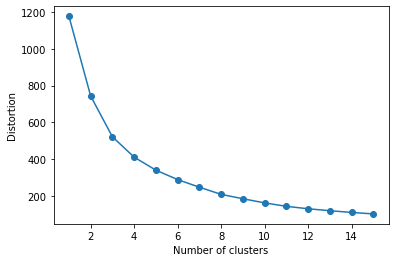

In [40]:
plot_distortion(cust_spending_demo_norm, max_clusters = 15)

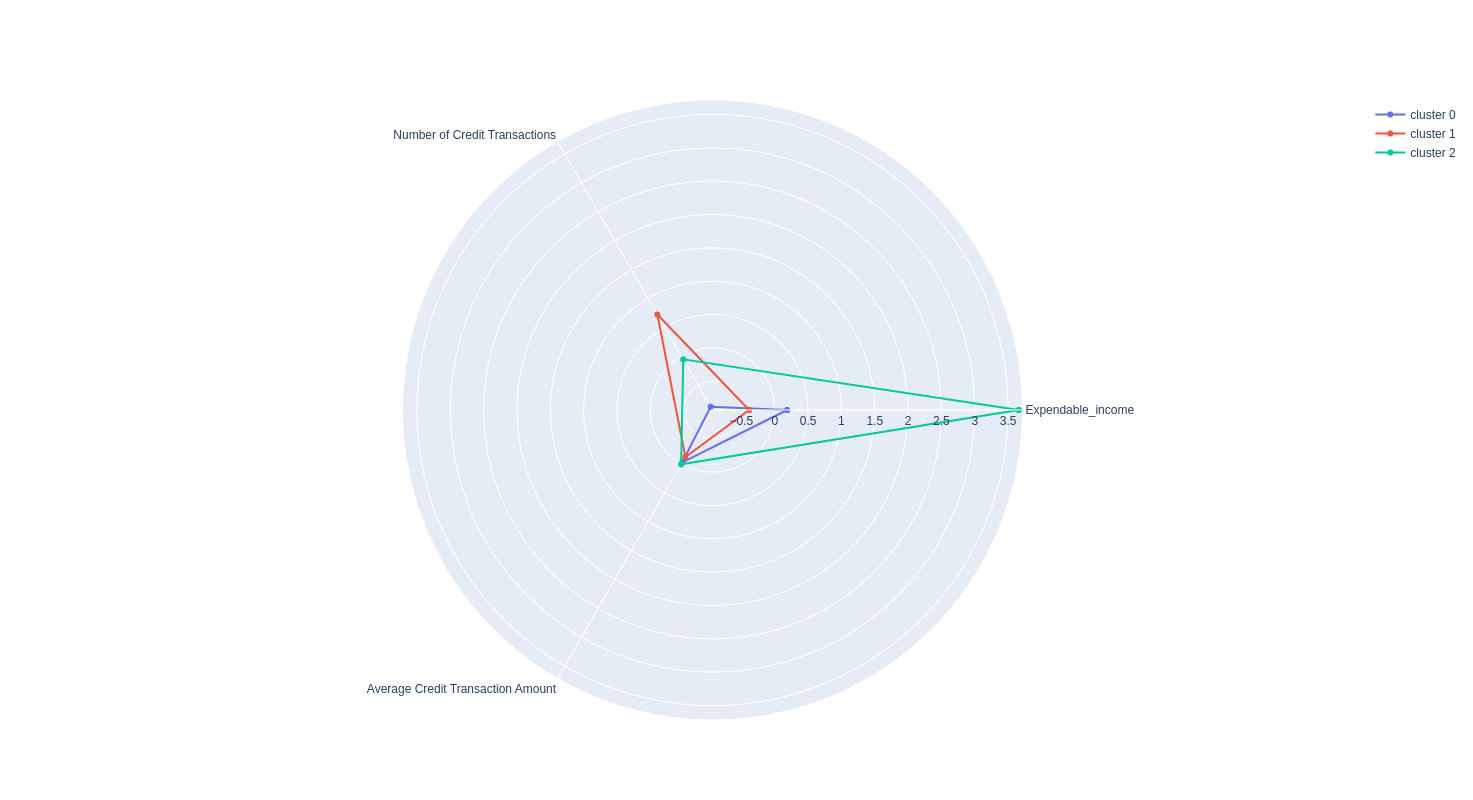

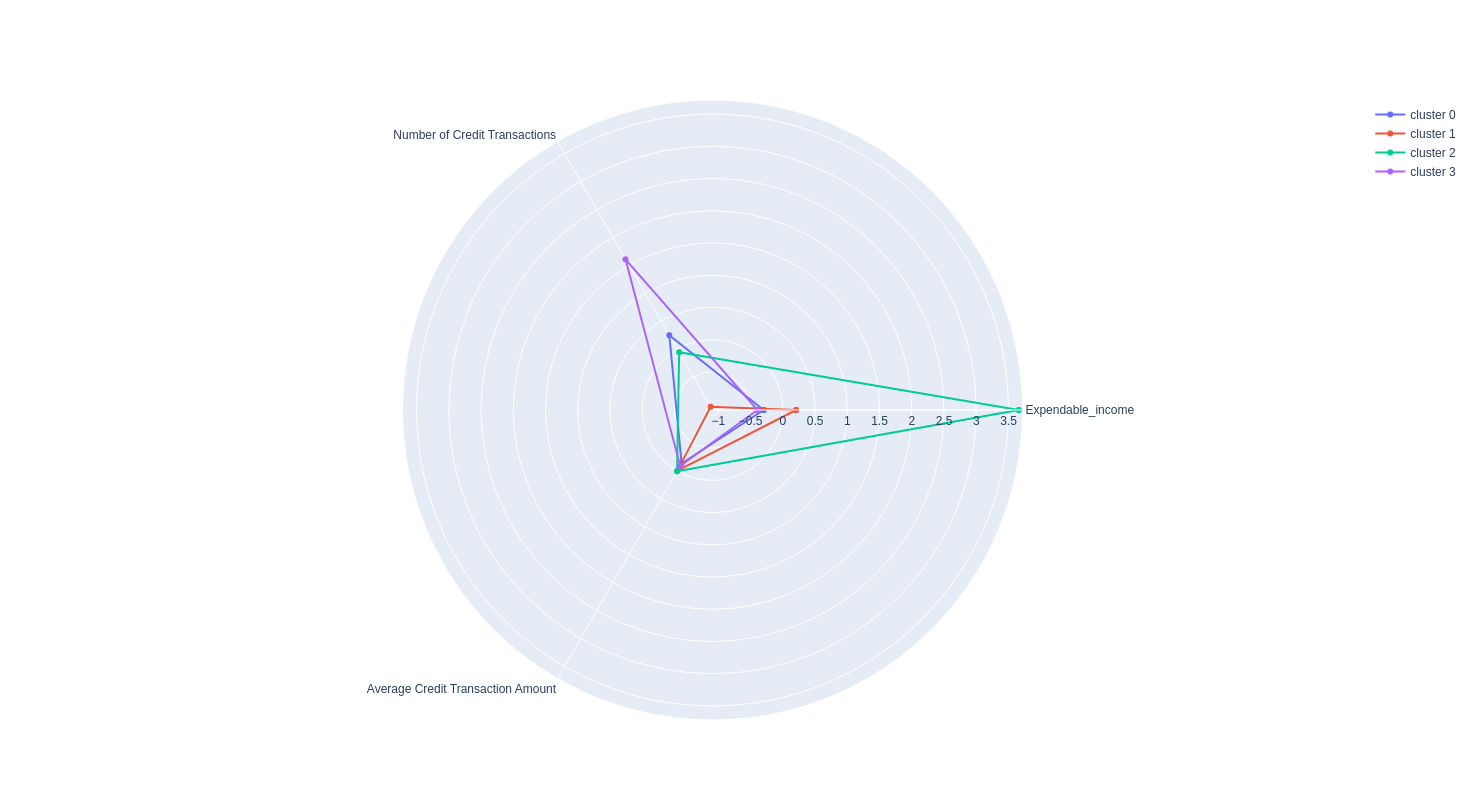

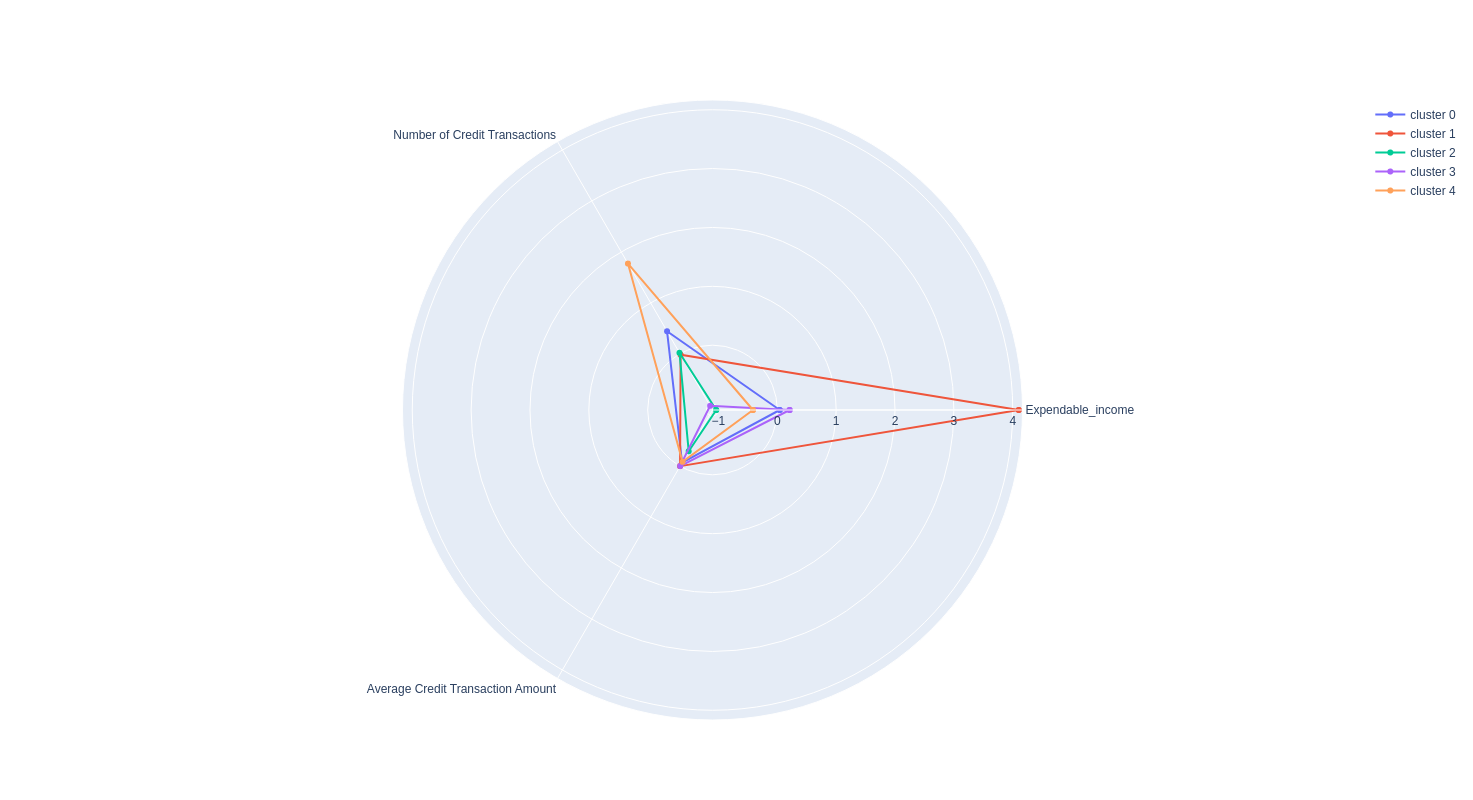

In [41]:
for i in range(3,6):
    plot_clusters_radar(cust_spending_demo_norm, fit_kmeans(cust_spending_demo_norm, i))

(566,)


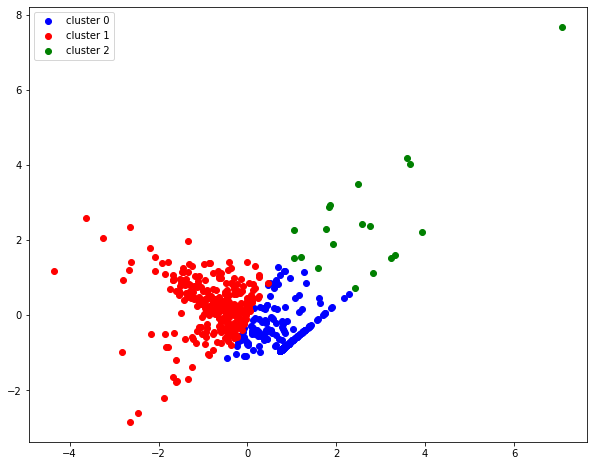

(566,)


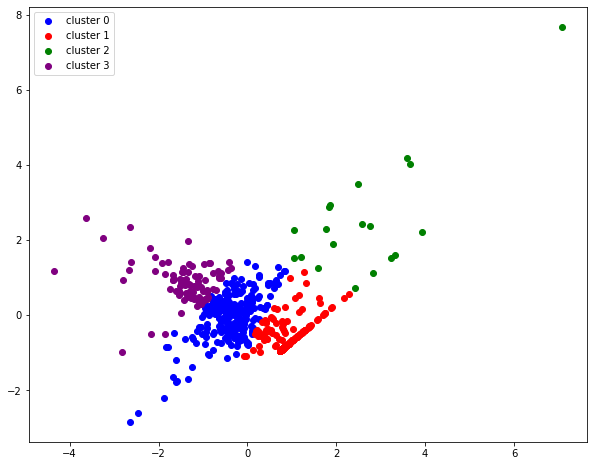

(566,)


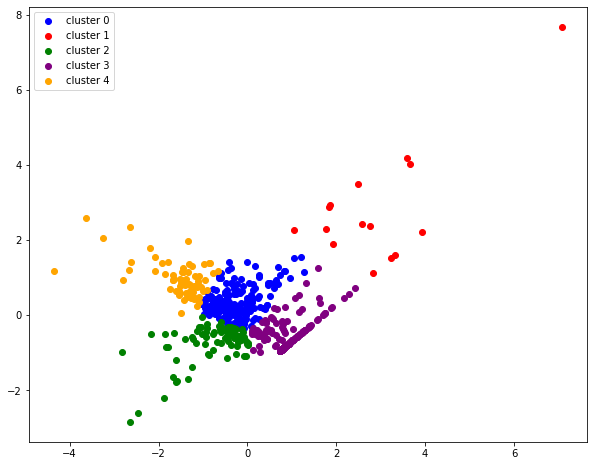

In [42]:
# plot pca biplots for i number of clusters. kmeans clusters as targets
for i in range(3,6):
    plot_pca_biplot(cust_spending_demo_norm,fit_kmeans(cust_spending_demo_norm,i)) 

In [43]:

customers_filtered = customer_income[['Expendable_income','Number of Credit Transactions','Average Credit Transaction Amount','age', 'income', 'years_with_bank', 'state_code']]
customer_profile_state = customers_filtered.groupby('state_code').mean().reset_index()
customer_profile_state

,state_code,Expendable_income,Number of Credit Transactions,Average Credit Transaction Amount,age,income,years_with_bank
0,AL,416.040000,44.666667,4.542829,44.333333,10960.000000,7.333333
1,AZ,704.779524,40.785714,-5.162671,49.714286,20976.523810,3.285714
2,CA,268.589848,46.222222,-7.275989,43.212121,25406.287879,3.977273
3,CO,2522.533000,48.142857,12.444106,48.700000,21801.700000,4.100000
4,DC,442.986667,53.166667,-0.314007,42.666667,17073.833333,5.500000
5,FL,-89.116154,43.700000,6.389010,49.076923,34844.923077,3.923077
6,GA,-655.935000,41.000000,7.243553,30.000000,21161.500000,4.500000
7,HI,-858.224286,43.500000,-6.070389,56.428571,18377.142857,4.857143
8,IL,1158.534634,45.241379,83.460931,43.487805,33731.634146,3.170732
9,IN,83.756364,45.875000,21.585161,60.909091,20237.363636,4.545455


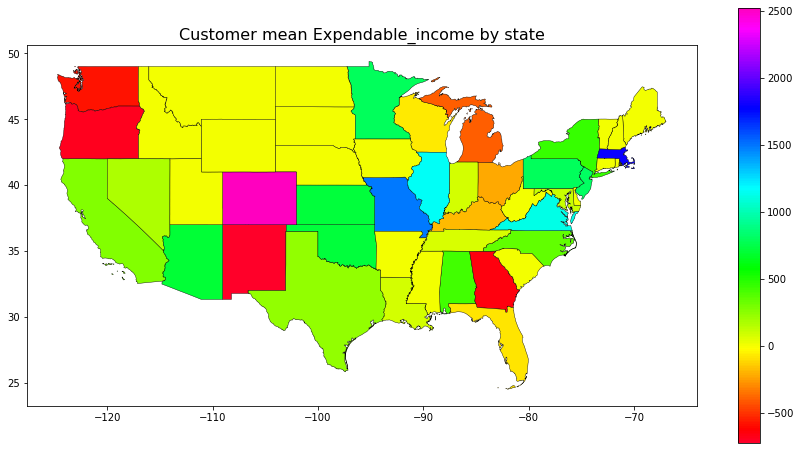

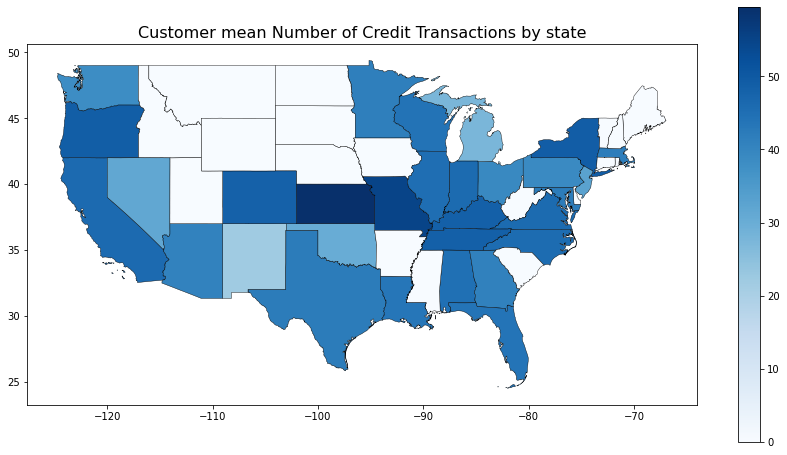

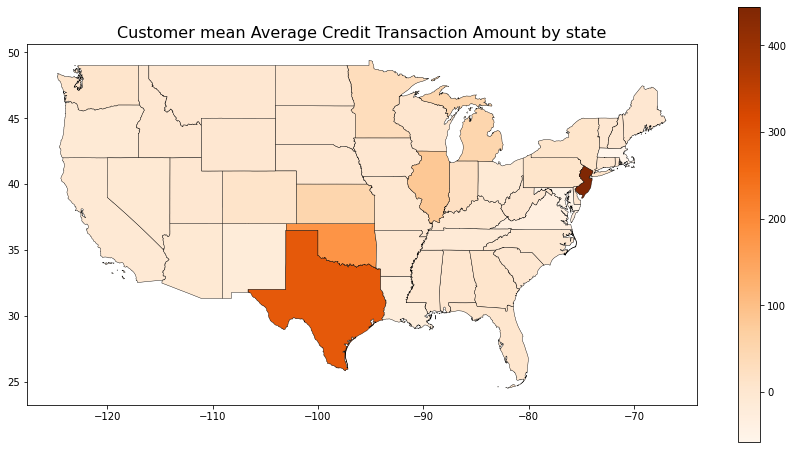

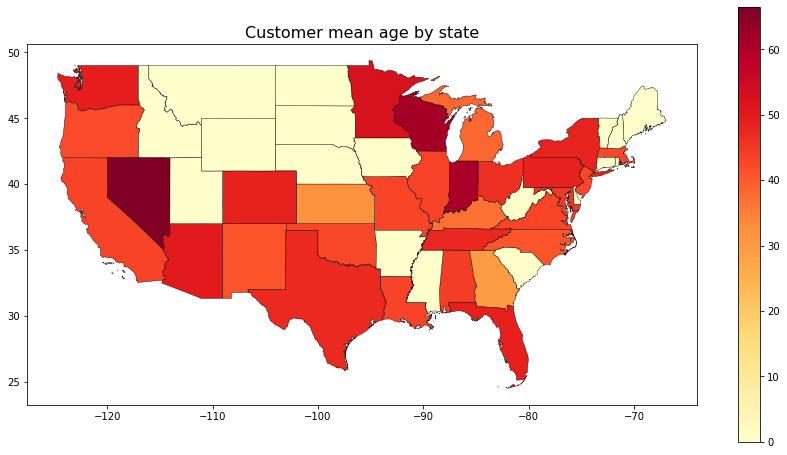

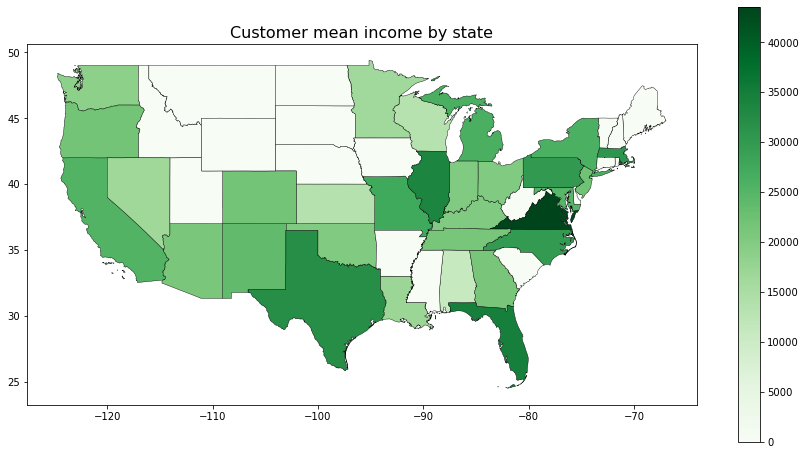

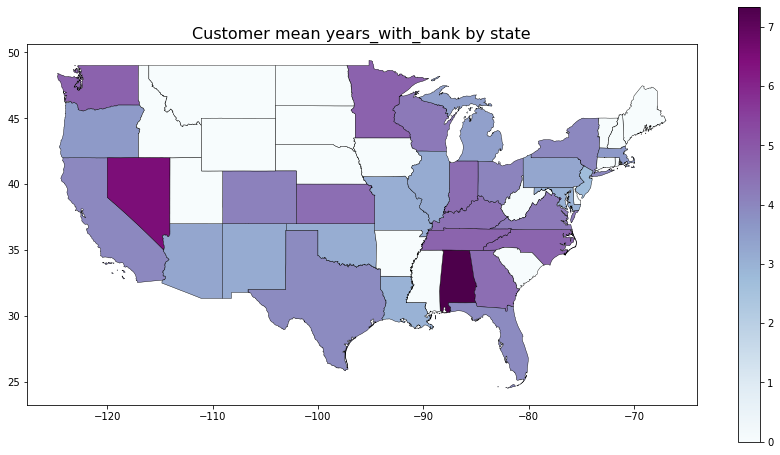

In [44]:
for i in range(len(customer_profile_state.columns)-1):
    plot_column_on_map(customer_profile_state, customer_profile_state.columns[i + 1])